In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from itertools import product
from pprint import pprint

from darts import concatenate, TimeSeries
from darts.dataprocessing.transformers import MinTReconciliator
from darts.metrics import mape
from darts.models import LinearRegressionModel, Theta

In [10]:
date_range = pd.date_range(start='2022-01-01', end='2024-11-11', freq='D')
saisies = pd.Series(np.random.randint(1500, 3001, size=len(date_range)), index=date_range)
receptions = saisies.apply(lambda x: x * np.random.uniform(0.2, 0.35))

df = pd.DataFrame(
    {
        "saisies": saisies,
        "receptions": receptions
    }
)

In [11]:
df_series = TimeSeries.from_dataframe(df)
hierarchy = {"receptions": ["saisies"]}
df_series = df_series.with_hierarchy(hierarchy)

In [12]:
train, val = df_series[:-150], df_series[-150:]
model = LinearRegressionModel(lags=12)
model.fit(train)
pred = model.predict(n=len(val))

<Axes: xlabel='time'>

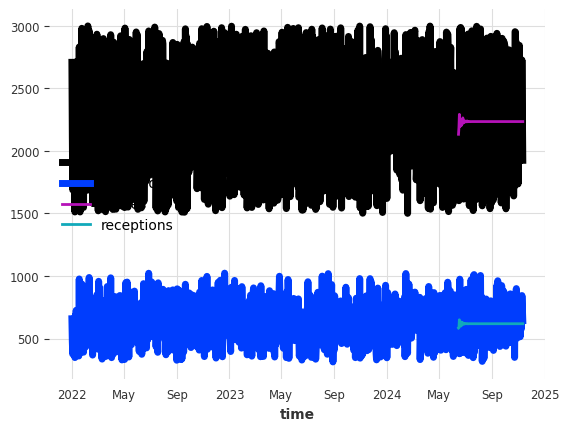

In [ ]:
df_series.plot(lw=5)
pred.plot(lw=2)

In [17]:
print("MAPE saisies : ", mape(pred["saisies"], val["saisies"]))
print("MAPE receptions : ", mape(pred["receptions"], val["receptions"]))

MAPE saisies :  18.089775125414235
MAPE receptions :  20.823854241288927


TopDownReconciliator ?

In [18]:
reconciliator = MinTReconciliator(method="wls_val")
reconciliator.fit(train)
reconcilied_preds = reconciliator.transform(pred)

<Axes: xlabel='time'>

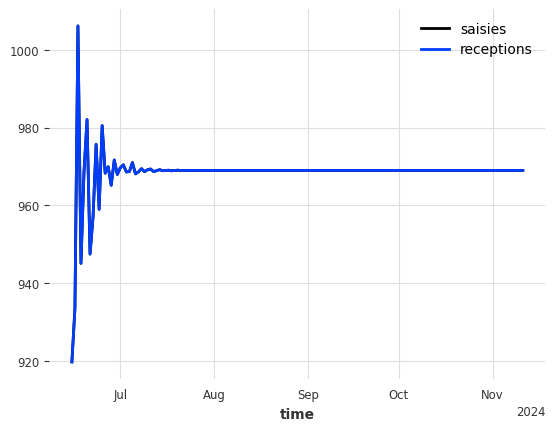

In [19]:
reconcilied_preds.plot()

In [20]:
print("MAPE saisies : ", mape(reconcilied_preds["saisies"], val["saisies"]))
print("MAPE receptions : ", mape(reconcilied_preds["receptions"], val["receptions"]))

MAPE saisies :  130.11254079034032
MAPE receptions :  35.30423039193218
